In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from pathlib import Path

datapath = Path('dataset')

train_df = pd.read_csv(datapath / 'train' / '_classes.csv')
val_df = pd.read_csv(datapath / 'valid' / '_classes.csv')
test_df = pd.read_csv(datapath / 'test' / '_classes.csv')

Found 2284 files.


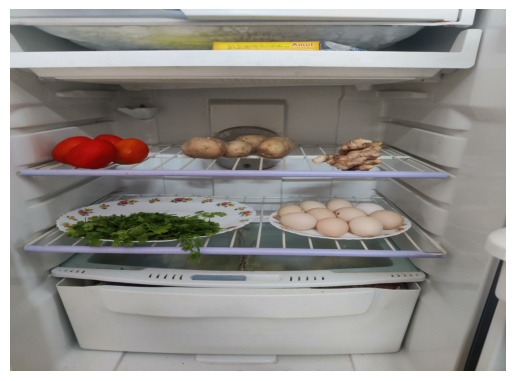

tf.Tensor(
[[[181.       189.       191.      ]
  [181.       189.       191.      ]
  [181.       189.       191.      ]
  ...
  [186.       190.       191.      ]
  [185.59375  189.59375  190.59375 ]
  [185.       189.       190.      ]]

 [[181.       189.       191.      ]
  [181.       189.       191.      ]
  [181.       189.       191.      ]
  ...
  [186.       190.       191.      ]
  [185.59375  189.59375  190.59375 ]
  [185.       189.       190.      ]]

 [[181.       189.       191.      ]
  [181.       189.       191.      ]
  [181.       189.       191.      ]
  ...
  [186.       190.       191.      ]
  [185.59375  189.59375  190.59375 ]
  [185.       189.       190.      ]]

 ...

 [[155.92847  143.92847  129.92847 ]
  [157.11597  145.11597  131.11597 ]
  [156.6368   145.60555  131.28264 ]
  ...
  [128.25134  134.25134  124.25134 ]
  [127.55128  133.55127  123.55128 ]
  [127.       133.       123.      ]]

 [[155.       143.       129.      ]
  [156.1875   144.1875   1

2025-11-13 12:29:59.752327: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
def load_dataframe(which_data='train'):
    df = pd.read_csv(datapath / which_data / '_classes.csv').sort_values('filename')
    image_dir = datapath / which_data
    images = sorted(image_dir.glob('*.jpg'))

    ds = tf.keras.utils.image_dataset_from_directory(image_dir, image_size=(1400, 1920), labels=None, batch_size=32)
    for images in ds.take(1):
        first_image = images[0].numpy().astype("uint8") # Convert to NumPy array and then to uint8 for display

        # Display the first image
        plt.imshow(first_image)
        plt.axis("off")
        plt.show()

    print(list(images)[0])
    print(df.head(1))
    print("No. of images:", len(df))
    # return df

load_dataframe()

No. of Training images: 2284
No. of Testing images: 322
No. of Validation images: 650
Sample image size: (1400, 1920)


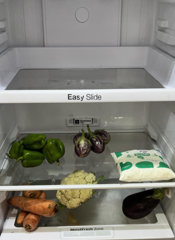

In [ ]:
train_data_dir = datapath / 'train'
test_data_dir = datapath / 'test'
val_data_dir = datapath / 'valid'

train_len = len(list())
test_len = len(list(test_data_dir.glob('*.jpg')))
val_len = len(list(val_data_dir.glob('*.jpg')))
print("No. of Training images:", train_len)
print("No. of Testing images:", test_len)
print("No. of Validation images:", val_len)

images = list(train_data_dir.glob('./*.jpg'))
sample_image = PIL.Image.open(str(images[0]))
print("Sample image size:", sample_image.size)
# Channels not displayed automatically, will need to be added manually.

sample_image.resize((175, 240)) # Resizing so it is easier to view

In [ ]:

df.sort_values('filename').head(10)

,filename,apple,basil,bitter gourd,bread,brinjal,butter,cabbage,capsicum,carrots,...,ginger,lemon,lettuce,milk,okra,onion,potato,pumpkin,tomato,watermelon
256,01f1c7f2-7601-4828-ae81-b055a82be673_JPG.rf.55...,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
823,02b50f9e-90d0-4e40-913c-87a893653000_JPG.rf.c4...,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
1761,079100ac-f3a9-4b7d-871e-2e98cf76dcca_JPG.rf.2b...,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
268,0b8af407-6287-4a6b-a309-42b3bfec3c38_JPG.rf.3f...,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
836,0def6f26-b75a-4b61-929f-de249ef2eac5_JPG.rf.0a...,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
444,0f103226-ac21-4432-a854-61e4deb76f3d_JPG.rf.68...,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
1727,1415c0f9-b91d-4c8b-891c-821495e50dd1_JPG.rf.95...,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
255,19b96410-9248-4749-9865-506c87a52f07_JPG.rf.6d...,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
1801,1a01d4b9-480a-4a18-a263-14d8374939b3_JPG.rf.3c...,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
887,20230912_201150_jpg.rf.b426310dd61fe2b96c2d4b7...,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,1,1,0,1,0


In [ ]:
train_data_files = list(train_data_dir.rglob("*.jpg"))
train_data_order = {train_data_files[i]: i for i in range(len(train_data_files))}
train_ds = tf.keras.utils.image_dataset_from_directory(train_data_dir, labels=None, batch_size=32)
df.sort_values(by='filename', key=lambda x: x.map(train_data_order)).head(10)

,filename,apple,basil,bitter gourd,bread,brinjal,butter,cabbage,capsicum,carrots,...,ginger,lemon,lettuce,milk,okra,onion,potato,pumpkin,tomato,watermelon
0,20231001_202540_jpg.rf.c8c5ce6427100c9a75545ef...,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
1,IMG_2901_jpg.rf.4c6daff2c09c1b9e16cec9a112b5bb...,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,IMG_4539_jpg.rf.cd8552ad418f356cfd234db0220158...,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,IMG_20231001_133604_jpg.rf.ff3fa86f43ee2082bee...,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,20231001_203028_jpg.rf.90aa70df798570c4db1917d...,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
5,20231001_202857_jpg.rf.116839bb40d0097b5bbf117...,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
6,IMG_4280_jpg.rf.05f56b10b1de942108e7815c8684b1...,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7,IMG_1186_JPEG.rf.fc83c22603134ef17c7810f8e2d5e...,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
8,IMG_4271_jpg.rf.df5f45c5bb216f22af53c19701b9f5...,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
9,IMG_4423_jpg.rf.3f55c1ce502ca409f17998260b0212...,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [6]:
train_ds

NameError: name 'train_ds' is not defined